In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('books_variation.xlsx')
df.head()

,title,date,price
0,The Immortals of Meluha,2019-01-24,254
1,The Immortals of Meluha,2019-01-25,254
2,The Immortals of Meluha,2019-01-26,296
3,The Immortals of Meluha,2019-01-27,221
4,The Immortals of Meluha,2019-01-28,221


In [3]:
book1 = df.loc[df['title'] == 'How The Secret Changed My Life']
book1 = book1.drop(columns='title')
book1

,date,price
84,2019-01-24,436
85,2019-01-25,436
86,2019-01-26,436
87,2019-01-27,436
88,2019-01-28,436
89,2019-01-29,436
90,2019-01-30,436
91,2019-01-31,436
92,2019-02-01,436
93,2019-02-02,436


In [4]:
book1['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
indexed_book1 = book1.set_index(['date'])
indexed_book1.index

DatetimeIndex(['2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', name='date', freq=None)

In [5]:
data = [go.Scatter(x= indexed_book1.index, y= indexed_book1.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [7]:
#Determining rolling statistics
rollmean = indexed_book1.rolling(window='14d').mean()  #monthly basis
rollstd = indexed_book1.rolling(window='14d').std()
rollmean, rollstd

(            price
 date             
 2019-01-24  436.0
 2019-01-25  436.0
 2019-01-26  436.0
 2019-01-27  436.0
 2019-01-28  436.0
 2019-01-29  436.0
 2019-01-30  436.0
 2019-01-31  436.0
 2019-02-01  436.0
 2019-02-02  436.0
 2019-02-03  436.0
 2019-02-04  436.0
 2019-02-05  436.0
 2019-02-06  436.0,             price
 date             
 2019-01-24    NaN
 2019-01-25    0.0
 2019-01-26    0.0
 2019-01-27    0.0
 2019-01-28    0.0
 2019-01-29    0.0
 2019-01-30    0.0
 2019-01-31    0.0
 2019-02-01    0.0
 2019-02-02    0.0
 2019-02-03    0.0
 2019-02-04    0.0
 2019-02-05    0.0
 2019-02-06    0.0)

In [9]:
#Plotting Rolling Statistics

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(x= rollmean.index , y= rollmean.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= rollstd.index , y= rollstd.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price')
              )
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [11]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexed_book1['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)


Test statistic                       NaN
p-value                              NaN
lags used                       0.000000
number of observations used    13.000000
Critical value (1%)            -4.068854
Critical value (5%)            -3.127149
Critical value (10%)           -2.701730
dtype: float64


In [12]:
#The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).
#Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis 
#that the time series is non-stationary and does have time-dependent structure.

In [13]:
#log transform the dataset to make the distribution of values more linear and better meet the expectations of this statistical test
import numpy as np
indexed_book1_logscale = np.log(indexed_book1)

data = [go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)]
plot(data, filename='line-mode')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `line-mode` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\line-mode.html'

In [14]:
# Moving Average with log timeseries

moving_avg = indexed_book1_logscale.rolling(window='14d').mean()
moving_std = indexed_book1_logscale.rolling(window='14d').std()
moving_avg, moving_std

(               price
 date                
 2019-01-24  6.077642
 2019-01-25  6.077642
 2019-01-26  6.077642
 2019-01-27  6.077642
 2019-01-28  6.077642
 2019-01-29  6.077642
 2019-01-30  6.077642
 2019-01-31  6.077642
 2019-02-01  6.077642
 2019-02-02  6.077642
 2019-02-03  6.077642
 2019-02-04  6.077642
 2019-02-05  6.077642
 2019-02-06  6.077642,             price
 date             
 2019-01-24    NaN
 2019-01-25    0.0
 2019-01-26    0.0
 2019-01-27    0.0
 2019-01-28    0.0
 2019-01-29    0.0
 2019-01-30    0.0
 2019-01-31    0.0
 2019-02-01    0.0
 2019-02-02    0.0
 2019-02-03    0.0
 2019-02-04    0.0
 2019-02-05    0.0
 2019-02-06    0.0)

In [15]:
trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [16]:
#Difference between log timeseries and moving average

logminusMA = indexed_book1_logscale - moving_avg
logminusMA

,price
date,
2019-01-24,0.000000e+00
2019-01-25,0.000000e+00
2019-01-26,-8.881784e-16
2019-01-27,0.000000e+00
2019-01-28,0.000000e+00
2019-01-29,8.881784e-16
2019-01-30,8.881784e-16
2019-01-31,8.881784e-16
2019-02-01,8.881784e-16


In [17]:
#Determining the Stationarity of data

moving_avg = logminusMA.rolling(window='14d').mean()
moving_std = logminusMA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusMA.index, y= logminusMA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [18]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusMA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                  0.538028
p-value                         0.985984
lags used                       0.000000
number of observations used    13.000000
Critical value (1%)            -4.068854
Critical value (5%)            -3.127149
Critical value (10%)           -2.701730
dtype: float64


In [19]:
#Calculate the weighted average to see the trend
#DataFrame.ewm : Provides exponential weighted functions

weighted_avg = indexed_book1_logscale.ewm(com=0.5).mean()
weighted_avg

,price
date,
2019-01-24,6.077642
2019-01-25,6.077642
2019-01-26,6.077642
2019-01-27,6.077642
2019-01-28,6.077642
2019-01-29,6.077642
2019-01-30,6.077642
2019-01-31,6.077642
2019-02-01,6.077642


In [20]:
trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)
trace2 = go.Scatter(x= weighted_avg.index , y= weighted_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')

#As you can see, the trend is moving with the logged data with respect to time

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [21]:
#Difference between log timeseries and weighted average

logminusWA = indexed_book1_logscale - weighted_avg
print(logminusWA)

#Determining the Stationarity of data

moving_avg = logminusWA.rolling(window='14d').mean()
moving_std = logminusWA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusWA.index, y= logminusWA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

            price
date             
2019-01-24    0.0
2019-01-25    0.0
2019-01-26    0.0
2019-01-27    0.0
2019-01-28    0.0
2019-01-29    0.0
2019-01-30    0.0
2019-01-31    0.0
2019-02-01    0.0
2019-02-02    0.0
2019-02-03    0.0
2019-02-04    0.0
2019-02-05    0.0
2019-02-06    0.0


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [22]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusWA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                       NaN
p-value                              NaN
lags used                       0.000000
number of observations used    13.000000
Critical value (1%)            -4.068854
Critical value (5%)            -3.127149
Critical value (10%)           -2.701730
dtype: float64


In [23]:
# No difference in the p-value from original data and weighted average data
# Here timeseries is not stationary

In [24]:
#Shifting the values

indexed_book1_logscale_diffshift = indexed_book1_logscale - indexed_book1_logscale.shift()

data = [go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [25]:
indexed_book1_logscale_diffshift.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = indexed_book1_logscale_diffshift.rolling(window='14d').mean()
moving_std = indexed_book1_logscale_diffshift.rolling(window='14d').std()
    
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [26]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(indexed_book1_logscale_diffshift['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

# Here timeseries is stationary and null-hypothesis is rejected

Results of Dickey-Fuller test: 
Test statistic                       NaN
p-value                              NaN
lags used                       0.000000
number of observations used    12.000000
Critical value (1%)            -4.137829
Critical value (5%)            -3.154972
Critical value (10%)           -2.714477
dtype: float64


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_book1_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

from plotly import tools

trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price, name='Original')
trace2 = go.Scatter(x= trend.index, y= trend.price, name='Trend')
trace3 = go.Scatter(x= seasonal.index, y= seasonal.price, name='Seasonality')
trace4 = go.Scatter(x= residual.index, y= residual.price, name='Residual')

fig = tools.make_subplots(rows=4, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)


fig['layout'].update(title='Stacked subplots')
plot(fig, filename='stacked-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]



C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\stacked-subplots.html'

In [28]:
#Residuals are irregualr in nature
#So checking noise stationarity

decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = decomposed_logdata.rolling(window='14d').mean()
moving_std = decomposed_logdata.rolling(window='14d').std()
    
trace1 = go.Scatter(x= decomposed_logdata.index, y= decomposed_logdata.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [29]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexed_book1_logscale_diffshift)
lag_pacf = pacf(indexed_book1_logscale_diffshift)
#lag_acf,lag_pacf

#ACF
#trace1 = go.Scatter(y= lag_acf, name='Autocorrelation Function', type='bar')
trace1 = {"y": lag_acf, "name": "Autocorrelation Function", "type": "bar"}
trace2 = {"y": lag_pacf, "name": "Partial Autocorrelation Function", "type": "bar"}
#trace2 = go.Scatter(y= lag_pacf, name='Partial Autocorrelation Function', type='bar')

data = [trace1, trace2]
layout = dict(title = 'ACF and PACF Plots')
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:476: RuntimeWarning:

invalid value encountered in true_divide



LinAlgError: Singular matrix

In [30]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1_logscale, order= (3,1,0))
results_AR = model.fit(disp=-1)

print("Plotting AR Model...")
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_AR.fittedvalues, name='AR fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_AR.fittedvalues-indexed_book1_logscale_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

Plotting AR Model...


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [31]:
#MA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1_logscale, order= (0,1,0))
results_MA = model.fit(disp=-1)

print("Plotting MA Model...")
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_MA.fittedvalues, name='MA fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_MA.fittedvalues-indexed_book1_logscale_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

Plotting MA Model...


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [32]:
#AR Model is better as it has less RSS value than MA Model

In [33]:
prediction = pd.Series(results_AR.fittedvalues, copy=True)
print(prediction)

prediction_cumsum = prediction.cumsum()
print(prediction_cumsum)

date
2019-01-25   -0.004674
2019-01-26   -0.005307
2019-01-27   -0.007247
2019-01-28   -0.007983
2019-01-29   -0.007983
2019-01-30   -0.031976
2019-01-31   -0.049538
2019-02-01    0.018617
2019-02-02    0.057097
2019-02-03    0.009205
2019-02-04   -0.007983
2019-02-05   -0.006903
2019-02-06   -0.026774
dtype: float64
date
2019-01-25   -0.004674
2019-01-26   -0.009981
2019-01-27   -0.017229
2019-01-28   -0.025212
2019-01-29   -0.033195
2019-01-30   -0.065171
2019-01-31   -0.114709
2019-02-01   -0.096092
2019-02-02   -0.038995
2019-02-03   -0.029790
2019-02-04   -0.037773
2019-02-05   -0.044676
2019-02-06   -0.071451
dtype: float64


In [34]:
prediction_log = pd.Series(indexed_book1_logscale.price.ix[0], index = indexed_book1_logscale.index)
prediction_log = prediction_log.add(prediction_cumsum, fill_value=0)
prediction_log

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



date
2019-01-24    5.389072
2019-01-25    5.384397
2019-01-26    5.379091
2019-01-27    5.371843
2019-01-28    5.363860
2019-01-29    5.355877
2019-01-30    5.323901
2019-01-31    5.274363
2019-02-01    5.292980
2019-02-02    5.350077
2019-02-03    5.359282
2019-02-04    5.351298
2019-02-05    5.344395
2019-02-06    5.317621
dtype: float64

In [35]:
prediction_ARIMA = np.exp(prediction_log)

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original data')
trace2 = go.Scatter(y=prediction_ARIMA, name='prdiction')

data = [trace1, trace2]
layout = dict(title = "Predictions")
fig = dict(data=data, layout=layout)
plot(fig)

'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [36]:
indexed_book1_logscale

,price
date,
2019-01-24,5.389072
2019-01-25,5.389072
2019-01-26,5.389072
2019-01-27,5.389072
2019-01-28,5.389072
2019-01-29,5.497168
2019-01-30,5.497168
2019-01-31,5.327876
2019-02-01,5.327876


(array([5.30039627, 5.32376712, 5.32874145, 5.31296578, 5.30419893,
        5.30372108, 5.30081584]),
 array([0.06018804, 0.07625982, 0.08078439, 0.08623018, 0.09443147,
        0.10154757, 0.10710098]),
 array([[5.18242989, 5.41836266],
        [5.17430062, 5.47323361],
        [5.17040695, 5.48707594],
        [5.14395773, 5.48197382],
        [5.11911664, 5.48928121],
        [5.1046915 , 5.50275066],
        [5.09090177, 5.51072991]]))

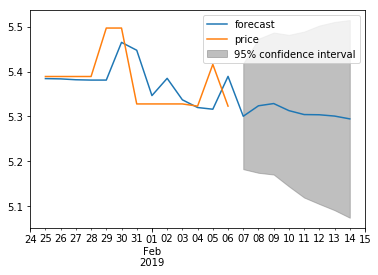

In [38]:
forecast = results_AR.forecast(steps=7)
#print(results_AR.forecast(steps=7))

results_AR.plot_predict(1,21)
results_AR.forecast(steps=7)